In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Bibliothèques importées avec succès!")

✅ Bibliothèques importées avec succès!


CHARGEMENT DES DONNÉES

In [3]:
df = pd.read_csv(r'C:\Users\ayoub\OneDrive\Documents\SMS_Spam_Detection\DataSet\spam.csv', encoding='latin-1')

# Afficher les premières lignes
print("\n" + "="*70)
print("APERÇU DU DATASET")
print("="*70)
print(df.head(10))

# Informations sur le dataset
print("\n" + "="*70)
print("INFORMATIONS SUR LE DATASET")
print("="*70)
print(df.info())


APERÇU DU DATASET
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
5        NaN        N

NETTOYAGE INITIAL DES DONNÉES

In [4]:
df = df[['v1', 'v2']]

# Renommer les colonnes pour plus de clarté
df.columns = ['label', 'message']

print("\n" + "="*70)
print("DATASET APRÈS NETTOYAGE")
print("="*70)
print(df.head())
print(f"\nShape: {df.shape}")


DATASET APRÈS NETTOYAGE
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Shape: (5572, 2)


In [5]:
# Vérifier les valeurs manquantes
print("\n" + "="*70)
print("VALEURS MANQUANTES")
print("="*70)
print(df.isnull().sum())


VALEURS MANQUANTES
label      0
message    0
dtype: int64


In [6]:
# Vérifier les doublons
duplicates = df.duplicated().sum()
print(f"\nNombre de doublons: {duplicates}")

# Supprimer les doublons si présents
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"✅ Doublons supprimés! Nouveau shape: {df.shape}")


Nombre de doublons: 403
✅ Doublons supprimés! Nouveau shape: (5169, 2)


ANALYSE DE LA DISTRIBUTION DES CLASSES

In [7]:
print("\n" + "="*70)
print("DISTRIBUTION DES CLASSES")
print("="*70)

# Compter les classes
class_counts = df['label'].value_counts()
print(class_counts)
print(f"\nPourcentage:")
print(df['label'].value_counts(normalize=True) * 100)


DISTRIBUTION DES CLASSES
label
ham     4516
spam     653
Name: count, dtype: int64

Pourcentage:
label
ham     87.366996
spam    12.633004
Name: proportion, dtype: float64


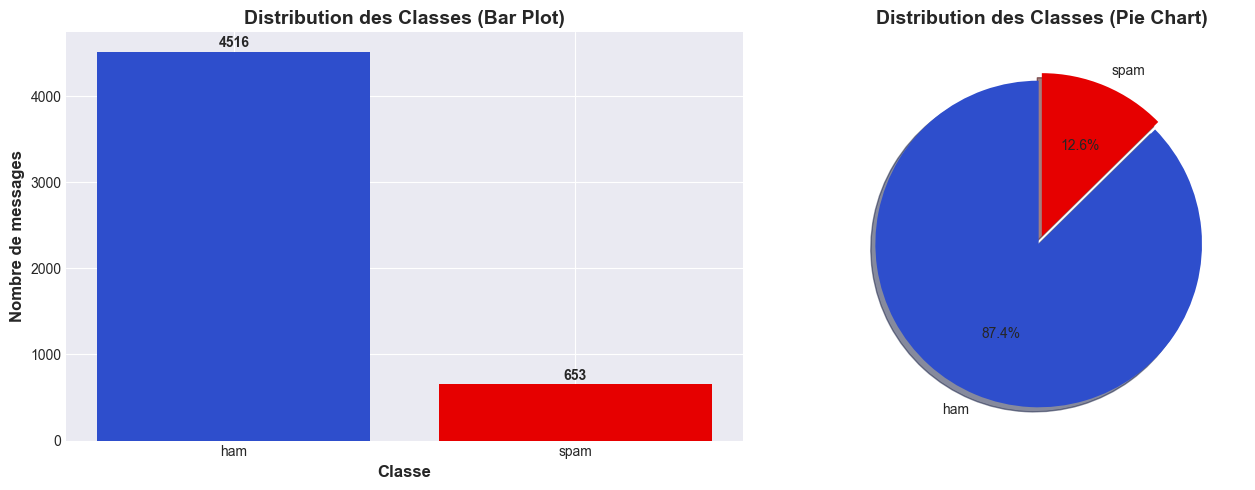

In [17]:
# Visualisation 1: Distribution des classes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(class_counts.index, class_counts.values, color=["#2e4ecc", '#e60000'])
axes[0].set_xlabel('Classe', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Nombre de messages', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution des Classes (Bar Plot)', fontsize=14, fontweight='bold')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ["#2e4ecc", "#e60000"]
explode = (0.05, 0)
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            startangle=90, colors=colors, explode=explode, shadow=True)
axes[1].set_title('Distribution des Classes (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('results/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [18]:
# Analyser le déséquilibre
ratio = class_counts['ham'] / class_counts['spam']
print(f"\n⚠️ Ratio Ham/Spam: {ratio:.2f}:1")
print("Note: Dataset déséquilibré - il faudra gérer ça pendant l'entraînement!")


⚠️ Ratio Ham/Spam: 6.92:1
Note: Dataset déséquilibré - il faudra gérer ça pendant l'entraînement!


ANALYSE DE LA LONGUEUR DES MESSAGES

In [19]:
print("\n" + "="*70)
print("ANALYSE DE LA LONGUEUR DES MESSAGES")
print("="*70)

# Calculer la longueur en caractères
df['length'] = df['message'].apply(len)

# Calculer la longueur en mots
df['word_count'] = df['message'].apply(lambda x: len(x.split()))

# Statistiques par classe
print("\nSTATISTIQUES DE LONGUEUR (Caractères):")
print(df.groupby('label')['length'].describe())

print("\nSTATISTIQUES DE LONGUEUR (Mots):")
print(df.groupby('label')['word_count'].describe())


ANALYSE DE LA LONGUEUR DES MESSAGES

STATISTIQUES DE LONGUEUR (Caractères):
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0
spam    653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0

STATISTIQUES DE LONGUEUR (Mots):
        count       mean        std  min   25%   50%   75%    max
label                                                            
ham    4516.0  14.134632  11.116240  1.0   7.0  11.0  18.0  171.0
spam    653.0  23.681470   5.967672  2.0  22.0  25.0  28.0   35.0


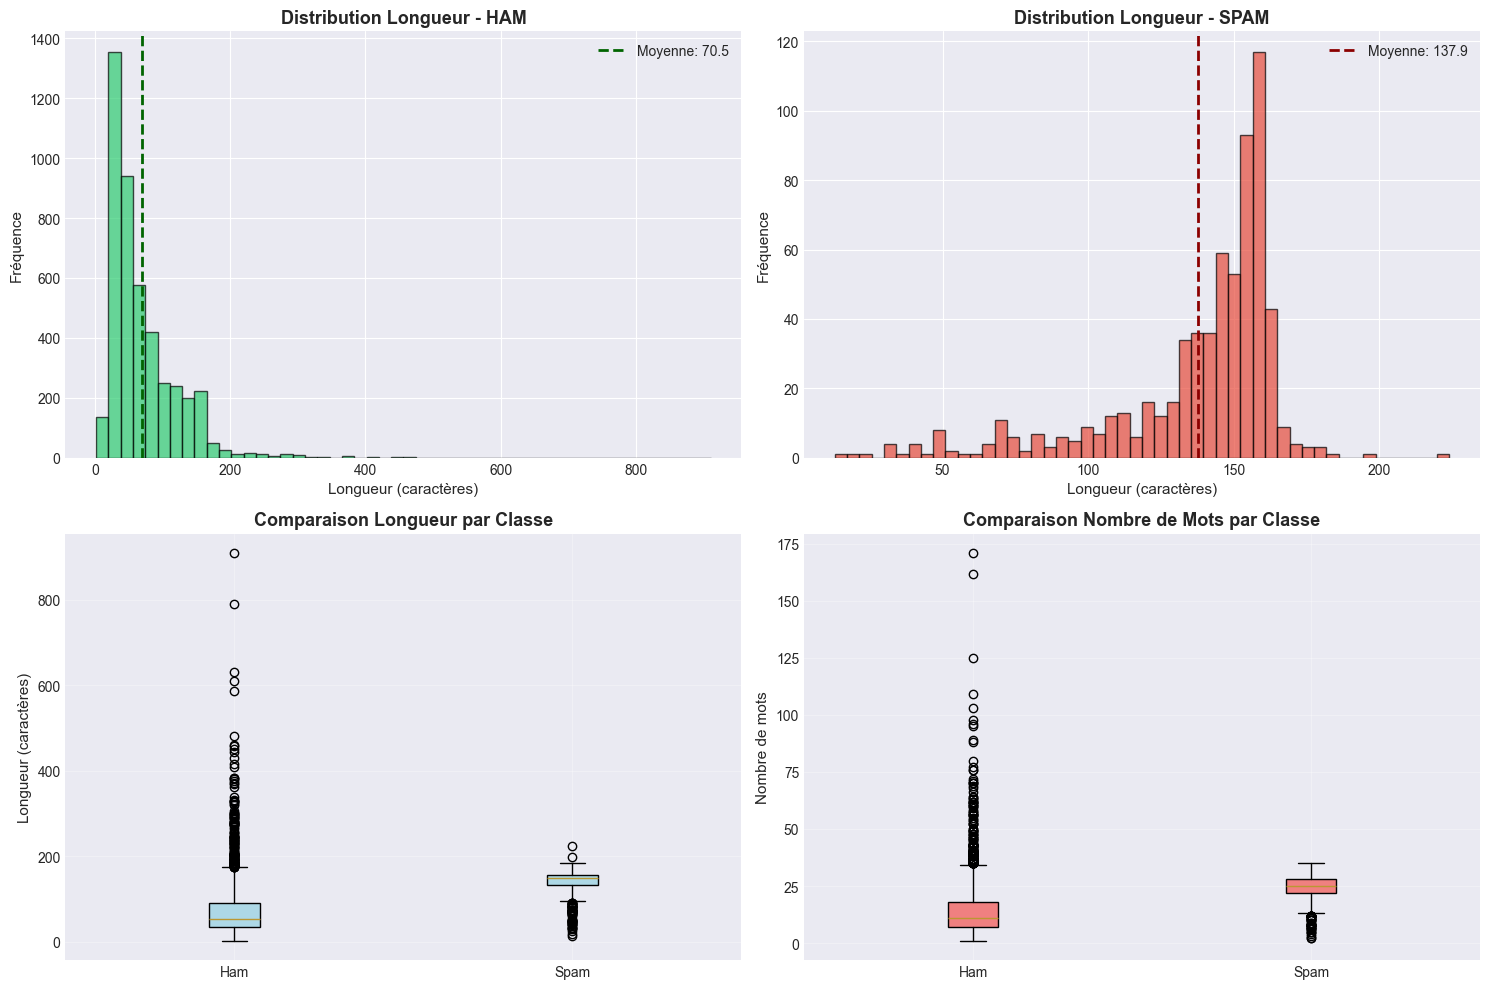


 OBSERVATION CLÉ:
- Messages SPAM sont en moyenne 1.96x plus longs que HAM


In [21]:
# Visualisation 2: Distribution de la longueur
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution longueur caractères - Ham
axes[0, 0].hist(df[df['label']=='ham']['length'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Longueur (caractères)', fontsize=11)
axes[0, 0].set_ylabel('Fréquence', fontsize=11)
axes[0, 0].set_title('Distribution Longueur - HAM', fontsize=13, fontweight='bold')
axes[0, 0].axvline(df[df['label']=='ham']['length'].mean(), color='darkgreen', 
                    linestyle='--', linewidth=2, label=f'Moyenne: {df[df["label"]=="ham"]["length"].mean():.1f}')
axes[0, 0].legend()


# Distribution longueur caractères - Spam
axes[0, 1].hist(df[df['label']=='spam']['length'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Longueur (caractères)', fontsize=11)
axes[0, 1].set_ylabel('Fréquence', fontsize=11)
axes[0, 1].set_title('Distribution Longueur - SPAM', fontsize=13, fontweight='bold')
axes[0, 1].axvline(df[df['label']=='spam']['length'].mean(), color='darkred', 
                    linestyle='--', linewidth=2, label=f'Moyenne: {df[df["label"]=="spam"]["length"].mean():.1f}')
axes[0, 1].legend()

# Boxplot comparatif - Caractères
axes[1, 0].boxplot([df[df['label']=='ham']['length'], df[df['label']=='spam']['length']], 
                    labels=['Ham', 'Spam'], patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
axes[1, 0].set_ylabel('Longueur (caractères)', fontsize=11)
axes[1, 0].set_title('Comparaison Longueur par Classe', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Boxplot comparatif - Mots
axes[1, 1].boxplot([df[df['label']=='ham']['word_count'], df[df['label']=='spam']['word_count']], 
                    labels=['Ham', 'Spam'], patch_artist=True,
                    boxprops=dict(facecolor='lightcoral'))
axes[1, 1].set_ylabel('Nombre de mots', fontsize=11)
axes[1, 1].set_title('Comparaison Nombre de Mots par Classe', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


# Observation clé
print("\n OBSERVATION CLÉ:")
avg_spam = df[df['label']=='spam']['length'].mean()
avg_ham = df[df['label']=='ham']['length'].mean()
print(f"- Messages SPAM sont en moyenne {avg_spam/avg_ham:.2f}x plus longs que HAM")


ANALYSE DES CARACTÈRES SPÉCIAUX

In [22]:
print("\n" + "="*70)
print("ANALYSE DES CARACTÈRES SPÉCIAUX")
print("="*70)

# Fonction pour compter caractères spéciaux
def count_special_chars(text):
    return sum(1 for char in text if not char.isalnum() and not char.isspace())

def count_digits(text):
    return sum(1 for char in text if char.isdigit())

def count_uppercase(text):
    return sum(1 for char in text if char.isupper())


ANALYSE DES CARACTÈRES SPÉCIAUX


In [23]:
# Appliquer les fonctions
df['special_chars'] = df['message'].apply(count_special_chars)
df['digit_count'] = df['message'].apply(count_digits)
df['uppercase_count'] = df['message'].apply(count_uppercase)

# Statistiques
print("\nMOYENNE DES CARACTÈRES SPÉCIAUX:")
print(df.groupby('label')[['special_chars', 'digit_count', 'uppercase_count']].mean())


MOYENNE DES CARACTÈRES SPÉCIAUX:
       special_chars  digit_count  uppercase_count
label                                             
ham         3.891275     0.290301         3.904119
spam        6.062787    15.447167        15.246554


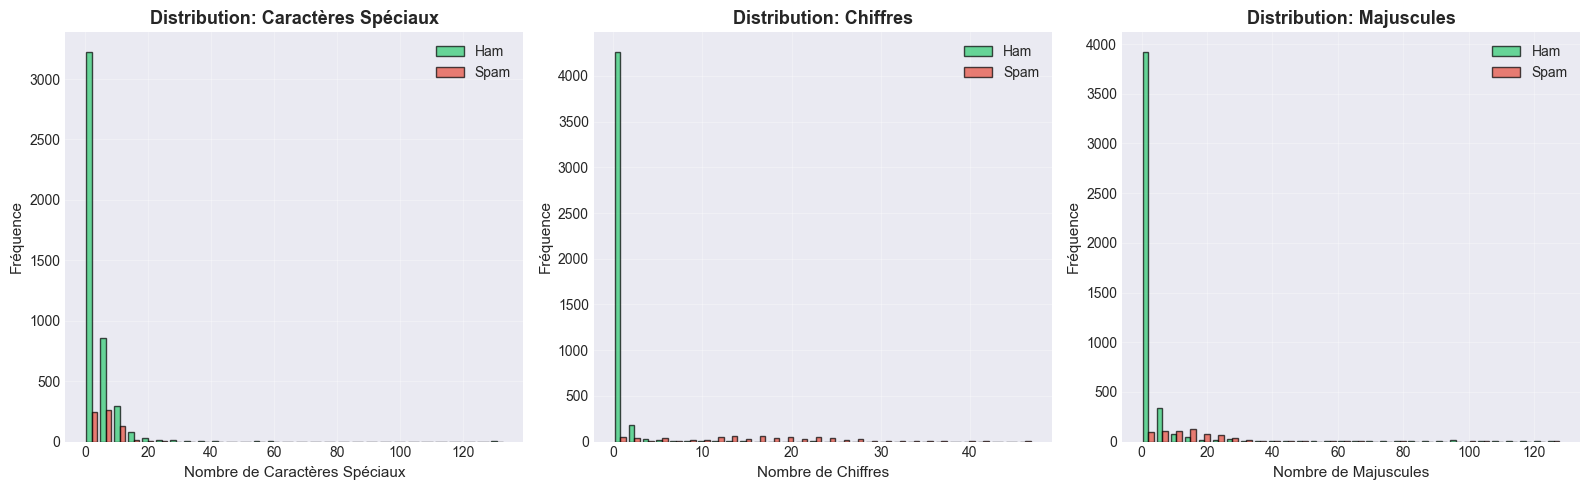

In [24]:
# Visualisation 3: Caractères spéciaux
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

features = ['special_chars', 'digit_count', 'uppercase_count']
titles = ['Caractères Spéciaux', 'Chiffres', 'Majuscules']
colors_list = ['#3498db', '#9b59b6', '#e67e22']

for i, (feature, title, color) in enumerate(zip(features, titles, colors_list)):
    data_ham = df[df['label']=='ham'][feature]
    data_spam = df[df['label']=='spam'][feature]
    
    axes[i].hist([data_ham, data_spam], bins=30, label=['Ham', 'Spam'], 
                 color=['#2ecc71', '#e74c3c'], alpha=0.7, edgecolor='black')
    axes[i].set_xlabel(f'Nombre de {title}', fontsize=11)
    axes[i].set_ylabel('Fréquence', fontsize=11)
    axes[i].set_title(f'Distribution: {title}', fontsize=13, fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('results/special_chars_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

ANALYSE DES MOTS LES PLUS FRÉQUENTS

In [25]:
print("\n" + "="*70)
print("ANALYSE DES MOTS LES PLUS FRÉQUENTS")
print("="*70)

from collections import Counter
import re

# Fonction pour extraire les mots
def get_words(text):
    # Convertir en minuscules et extraire les mots
    words = re.findall(r'\b[a-z]+\b', text.lower())
    return words

# Extraire tous les mots par classe
ham_words = []
spam_words = []

for msg, label in zip(df['message'], df['label']):
    words = get_words(msg)
    if label == 'ham':
        ham_words.extend(words)
    else:
        spam_words.extend(words)

# Top 20 mots
ham_counter = Counter(ham_words)
spam_counter = Counter(spam_words)

print("\nTOP 20 MOTS - HAM:")
for word, count in ham_counter.most_common(20):
    print(f"  {word:15s}: {count:5d}")

print("\nTOP 20 MOTS - SPAM:")
for word, count in spam_counter.most_common(20):
    print(f"  {word:15s}: {count:5d}")



ANALYSE DES MOTS LES PLUS FRÉQUENTS

TOP 20 MOTS - HAM:
  i              :  2775
  you            :  1875
  to             :  1474
  the            :  1051
  a              :   961
  u              :   915
  and            :   825
  in             :   757
  me             :   727
  my             :   675
  it             :   658
  is             :   649
  that           :   537
  of             :   478
  for            :   476
  s              :   467
  have           :   423
  so             :   420
  can            :   419
  but            :   414

TOP 20 MOTS - SPAM:
  to             :   596
  a              :   332
  call           :   309
  you            :   268
  your           :   242
  free           :   195
  for            :   184
  the            :   183
  now            :   164
  or             :   157
  u              :   147
  is             :   144
  txt            :   134
  from           :   122
  on             :   121
  ur             :   119
  have           :   1

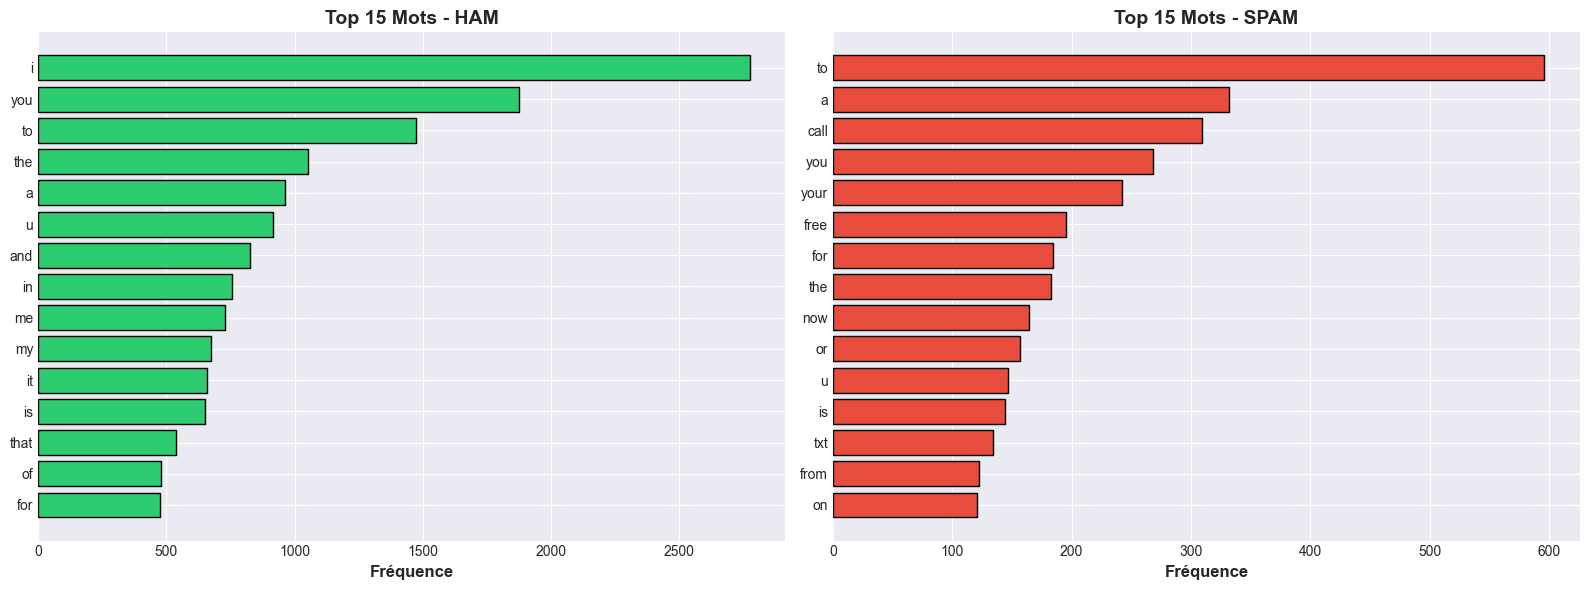

In [26]:
# Visualisation 4: Top mots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 15 HAM
top_ham = ham_counter.most_common(15)
words_ham, counts_ham = zip(*top_ham)
axes[0].barh(words_ham, counts_ham, color='#2ecc71', edgecolor='black')
axes[0].set_xlabel('Fréquence', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Mots - HAM', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Top 15 SPAM
top_spam = spam_counter.most_common(15)
words_spam, counts_spam = zip(*top_spam)
axes[1].barh(words_spam, counts_spam, color='#e74c3c', edgecolor='black')
axes[1].set_xlabel('Fréquence', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Mots - SPAM', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('results/top_words.png', dpi=300, bbox_inches='tight')
plt.show()

MOTS UNIQUES AU SPAM (Feature importante!)

In [27]:
print("\n" + "="*70)
print("MOTS SPÉCIFIQUES AU SPAM")
print("="*70)

# Trouver les mots qui apparaissent beaucoup plus dans spam que ham
ham_set = set(ham_words)
spam_set = set(spam_words)

# Mots uniquement dans spam
spam_only = spam_set - ham_set
print(f"\nMots UNIQUEMENT dans SPAM: {len(spam_only)}")
print("Exemples:", list(spam_only)[:20])


MOTS SPÉCIFIQUES AU SPAM

Mots UNIQUEMENT dans SPAM: 902
Exemples: ['careers', 'bridal', 'etlp', 'swap', 'avble', 'tattoos', 'noline', 'hotels', 'increments', 'stockport', 'compare', 'gbp', 'abuse', 'racal', 'westlife', 'records', 'unredeemed', 'alerts', 'leadership', 'reveal']


In [28]:
# Ratio spam/ham pour mots communs
common_words = ham_set & spam_set
spam_ratio = {}

for word in common_words:
    spam_count = spam_counter[word]
    ham_count = ham_counter[word]
    if ham_count > 0:
        spam_ratio[word] = spam_count / ham_count

# Top mots "spammy"
top_spammy = sorted(spam_ratio.items(), key=lambda x: x[1], reverse=True)[:20]

print("\nTOP 20 MOTS 'SPAMMY' (Ratio Spam/Ham):")
for word, ratio in top_spammy:
    spam_count = spam_counter[word]
    ham_count = ham_counter[word]
    print(f"  {word:15s}: {ratio:6.2f}x  (Spam:{spam_count:4d}, Ham:{ham_count:4d})")


TOP 20 MOTS 'SPAMMY' (Ratio Spam/Ham):
  www            :  83.00x  (Spam:  83, Ham:   1)
  uk             :  60.00x  (Spam:  60, Ham:   1)
  co             :  43.00x  (Spam:  43, Ham:   1)
  landline       :  29.00x  (Spam:  29, Ham:   1)
  code           :  28.00x  (Spam:  28, Ham:   1)
  nokia          :  28.00x  (Spam:  56, Ham:   2)
  award          :  24.00x  (Spam:  24, Ham:   1)
  attempt        :  22.00x  (Spam:  22, Ham:   1)
  club           :  19.00x  (Spam:  19, Ham:   1)
  delivery       :  18.00x  (Spam:  18, Ham:   1)
  service        :  16.33x  (Spam:  49, Ham:   3)
  services       :  16.00x  (Spam:  16, Ham:   1)
  music          :  16.00x  (Spam:  16, Ham:   1)
  await          :  16.00x  (Spam:  16, Ham:   1)
  private        :  16.00x  (Spam:  16, Ham:   1)
  video          :  15.50x  (Spam:  31, Ham:   2)
  games          :  15.00x  (Spam:  15, Ham:   1)
  statement      :  15.00x  (Spam:  15, Ham:   1)
  voucher        :  15.00x  (Spam:  15, Ham:   1)
  content 

DÉTECTION DE PATTERNS SPAM

In [29]:
print("\n" + "="*70)
print("DÉTECTION DE PATTERNS SPAM")
print("="*70)

# Patterns typiques de spam
patterns = {
    'free': r'\bfree\b',
    'win': r'\bwin\b|\bwon\b|\bwinner\b',
    'prize': r'\bprize\b',
    'call': r'\bcall\b',
    'txt': r'\btxt\b|\btext\b',
    'claim': r'\bclaim\b',
    'urgent': r'\burgent\b',
    'congratulations': r'\bcongrat',
    'mobile': r'\bmobile\b',
    'cash': r'\bcash\b'
}

# Compter les occurrences
pattern_counts = {pattern: {'ham': 0, 'spam': 0} for pattern in patterns}

for msg, label in zip(df['message'], df['label']):
    msg_lower = msg.lower()
    for pattern_name, pattern_regex in patterns.items():
        if re.search(pattern_regex, msg_lower):
            pattern_counts[pattern_name][label] += 1

# Afficher les résultats
print("\nOCCURRENCES DES PATTERNS:")
print(f"{'Pattern':<20} {'Ham':>8} {'Spam':>8} {'Spam %':>10}")
print("-" * 50)
for pattern, counts in pattern_counts.items():
    total = counts['ham'] + counts['spam']
    spam_pct = (counts['spam'] / total * 100) if total > 0 else 0
    print(f"{pattern:<20} {counts['ham']:>8} {counts['spam']:>8} {spam_pct:>9.1f}%")


DÉTECTION DE PATTERNS SPAM

OCCURRENCES DES PATTERNS:
Pattern                   Ham     Spam     Spam %
--------------------------------------------------
free                       55      148      72.9%
win                        24      114      82.6%
prize                       0       73     100.0%
call                      175      284      61.9%
txt                        78      207      72.6%
claim                       0       92     100.0%
urgent                      5       57      91.9%
congratulations            10       18      64.3%
mobile                     13       98      88.3%
cash                       12       55      82.1%


WORDCLOUD VISUALISATION


GÉNÉRATION DES WORDCLOUDS


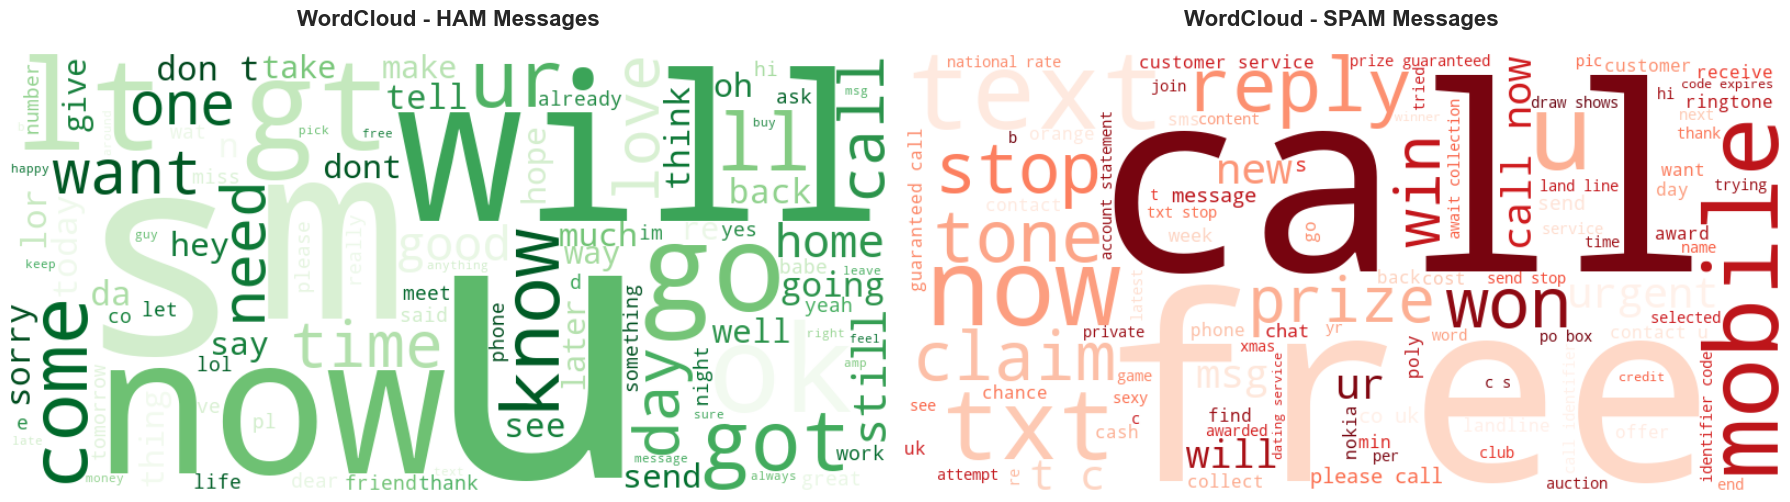

✅ WordClouds générés!


In [30]:
try:
    from wordcloud import WordCloud
    
    print("\n" + "="*70)
    print("GÉNÉRATION DES WORDCLOUDS")
    print("="*70)
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    
    # WordCloud HAM
    ham_text = ' '.join(ham_words)
    wordcloud_ham = WordCloud(width=800, height=400, background_color='white',
                               colormap='Greens', max_words=100).generate(ham_text)
    axes[0].imshow(wordcloud_ham, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title('WordCloud - HAM Messages', fontsize=16, fontweight='bold', pad=20)
    
    # WordCloud SPAM
    spam_text = ' '.join(spam_words)
    wordcloud_spam = WordCloud(width=800, height=400, background_color='white',
                                colormap='Reds', max_words=100).generate(spam_text)
    axes[1].imshow(wordcloud_spam, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title('WordCloud - SPAM Messages', fontsize=16, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.savefig('results/wordclouds.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ WordClouds générés!")
    
except ImportError:
    print("⚠️ WordCloud non installé. Install avec: pip install wordcloud")


SAUVEGARDE DU DATASET NETTOYÉ

In [32]:
print("\n" + "="*70)
print("SAUVEGARDE DES DONNÉES")
print("="*70)

# Sauvegarder le dataset avec les features ajoutées
df.to_csv('DataSet/spam_cleaned.csv', index=False)
print(" Dataset nettoyé sauvegardé: 'DataSet/spam_cleaned.csv'")

# Sauvegarder aussi les statistiques
stats = {
    'total_messages': len(df),
    'ham_count': len(df[df['label']=='ham']),
    'spam_count': len(df[df['label']=='spam']),
    'avg_length_ham': df[df['label']=='ham']['length'].mean(),
    'avg_length_spam': df[df['label']=='spam']['length'].mean(),
    'avg_words_ham': df[df['label']=='ham']['word_count'].mean(),
    'avg_words_spam': df[df['label']=='spam']['word_count'].mean()
}

import json
with open('results/eda_stats.json', 'w') as f:
    json.dump(stats, f, indent=4)

print(" Statistiques sauvegardées: 'results/eda_stats.json'")


SAUVEGARDE DES DONNÉES
 Dataset nettoyé sauvegardé: 'DataSet/spam_cleaned.csv'
 Statistiques sauvegardées: 'results/eda_stats.json'


RÉSUMÉ DE L'EXPLORATION

In [35]:
print("\n" + "="*70)
print("RÉSUMÉ DE L'EXPLORATION")
print("="*70)

print(f"""
 STATISTIQUES CLÉS:
   - Total messages: {len(df)}
   - Ham messages: {len(df[df['label']=='ham'])} ({len(df[df['label']=='ham'])/len(df)*100:.1f}%)
   - Spam messages: {len(df[df['label']=='spam'])} ({len(df[df['label']=='spam'])/len(df)*100:.1f}%)
   - Ratio déséquilibre: {ratio:.2f}:1

 LONGUEUR DES MESSAGES:
   - Ham: {df[df['label']=='ham']['length'].mean():.1f} caractères (avg)
   - Spam: {df[df['label']=='spam']['length'].mean():.1f} caractères (avg)
   - Spam est {avg_spam/avg_ham:.2f}x plus long

 VOCABULAIRE:
   - Mots uniques Ham: {len(ham_set)}
   - Mots uniques Spam: {len(spam_set)}
   - Mots communs: {len(common_words)}

 OBSERVATIONS IMPORTANTES:
   1. Dataset déséquilibré → besoin de class_weight ou SMOTE
   2. Spam contient plus de chiffres et caractères spéciaux
   3. Patterns clairs: "free", "win", "prize", "call" → features importantes
   4. Longueur du message est une feature discriminante
   5. Certains mots sont très "spammy" (ratio élevé)

 PROCHAINES ÉTAPES:
   ✓ Exploration terminée
   → Notebook 2: Prétraitement pour Deep Learning
   → Notebook 3: Modèles classiques (LSTM, GRU, CNN)
""")

print("="*70)
print("✅ EXPLORATION TERMINÉE!")
print("="*70)


RÉSUMÉ DE L'EXPLORATION

 STATISTIQUES CLÉS:
   - Total messages: 5169
   - Ham messages: 4516 (87.4%)
   - Spam messages: 653 (12.6%)
   - Ratio déséquilibre: 14.00:1

 LONGUEUR DES MESSAGES:
   - Ham: 70.5 caractères (avg)
   - Spam: 137.9 caractères (avg)
   - Spam est 1.96x plus long

 VOCABULAIRE:
   - Mots uniques Ham: 6631
   - Mots uniques Spam: 1934
   - Mots communs: 1032

 OBSERVATIONS IMPORTANTES:
   1. Dataset déséquilibré → besoin de class_weight ou SMOTE
   2. Spam contient plus de chiffres et caractères spéciaux
   3. Patterns clairs: "free", "win", "prize", "call" → features importantes
   4. Longueur du message est une feature discriminante
   5. Certains mots sont très "spammy" (ratio élevé)

 PROCHAINES ÉTAPES:
   ✓ Exploration terminée
   → Notebook 2: Prétraitement pour Deep Learning
   → Notebook 3: Modèles classiques (LSTM, GRU, CNN)

✅ EXPLORATION TERMINÉE!
